In [1]:
# Import library yang kalian butuhkan
import os
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
from tqdm import tqdm
import math
import random
import seaborn as sns

Code di atas adalah impor library yang dibutuhkan untuk proses analisis dan pemrosesan gambar dalam proyek. Library yang diimpor mencakup berbagai fungsi dan alat yang diperlukan, seperti os untuk manajemen file, matplotlib.pyplot untuk visualisasi data, cv2 (OpenCV) untuk pemrosesan gambar, numpy untuk manipulasi array, pandas untuk analisis data, tqdm untuk monitoring progress, math untuk operasi matematika, random untuk pembangkit bilangan acak, dan seaborn untuk visualisasi data statistik.

## Data Loading

In [2]:
def resizeImg(image, ukuranTarget):

    tinggi, lebar, _ = image.shape
    lebarTarget, tinggiTarget = ukuranTarget
    hasil = np.zeros((tinggiTarget, lebarTarget, 3), dtype=np.uint8)
    
    for i in range(tinggiTarget):
        for j in range(lebarTarget):
            x = int(j * lebar / lebarTarget)
            y = int(i * tinggi / tinggiTarget)
            hasil[i, j] = image[y, x]
    
    return hasil

Fungsi resizeImg bertujuan untuk meresize gambar ke ukuran target yang diinginkan. Pertama, fungsi ini mengambil gambar asli beserta ukuran target yang diinginkan sebagai input. Kemudian, gambar tersebut dipecah menjadi bagian-bagian yang lebih kecil sesuai dengan ukuran target yang ditentukan, dengan memperhitungkan proporsi antara lebar dan tinggi gambar asli serta lebar dan tinggi target. Setelah itu, nilai piksel di setiap bagian yang baru dihasilkan dengan ukuran target disesuaikan dengan nilai piksel yang paling dekat dari gambar asli. Akhirnya, gambar hasil resize tersebut dikembalikan sebagai output dari fungsi. 

In [3]:
def insertImg(folder):
    data = []
    namaFile = []
    labelData = [] 
    dataDistribusi = {}
    for label in (os.listdir(folder)):
        images = os.listdir(folder+label)
        dataDistribusi[label] = len(images)
        labelData.append(label)
        print(label)
        for filename in tqdm(os.listdir(folder+label)):
            img = cv.imread(os.path.join(folder+label,filename))
            if img is not None:
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img = resizeImg(img, (150, 150))
                namaFile.append(filename)
                data.append(img)
    return data, namaFile, labelData , dataDistribusi

Fungsi insertImg dirancang untuk mengimpor dan memproses gambar-gambar dari folder yang ditentukan. Fungsi ini pertama-tama membuat struktur data untuk menyimpan gambar-gambar, nama file, label data, dan distribusi data. Selanjutnya, fungsi melakukan iterasi pada setiap label yang ada di dalam folder, menghitung jumlah gambar dalam setiap label, dan menyimpan informasi distribusi tersebut. Selanjutnya, fungsi membaca setiap gambar dalam setiap label, melakukan konversi warna dari BGR ke RGB (format yang umum digunakan dalam pemrosesan gambar), dan meresize gambar tersebut menjadi ukuran yang diinginkan. Gambar beserta informasi nama file dan labelnya kemudian disimpan ke dalam struktur data yang telah disiapkan sebelumnya.

Code dibawah ini merupakan fungsi insertImg untuk mengimpor dan memproses gambar-gambar dari folder "ImgJari/". Setelah eksekusi fungsi, variabel data akan berisi array gambar-gambar yang telah diimpor dan diproses, namaFile akan berisi daftar nama file gambar, label akan berisi daftar label yang sesuai dengan gambar-gambar tersebut, dan distribusi akan berisi informasi tentang jumlah gambar dalam setiap kelas. Kemudian, hasil eksekusi fungsi ini dicetak, menampilkan jumlah data, jumlah label, jumlah nama file, dan distribusi data. 

In [4]:
data, namaFile,label, distribusi = insertImg("ImgJari/") 
print("Data: ", len(data))
print("Label: ", len(label))
print("nama File: ", len(namaFile))
print("Data Distribusi: ", distribusi)

F1


100%|██████████| 422/422 [00:09<00:00, 44.18it/s]


F2


100%|██████████| 419/419 [00:09<00:00, 43.96it/s]


F3


100%|██████████| 420/420 [00:09<00:00, 43.04it/s]


F4


100%|██████████| 419/419 [00:10<00:00, 41.62it/s]


F5


100%|██████████| 420/420 [00:10<00:00, 41.37it/s]

Data:  2100
Label:  5
nama File:  2100
Data Distribusi:  {'F1': 422, 'F2': 419, 'F3': 420, 'F4': 419, 'F5': 420}


Code dibawah ini merupakan fungsi distribusiImg digunakan untuk memvisualisasikan distribusi data dalam bentuk diagram batang. Pertama, fungsi ini membuat sebuah plot berukuran 10x5 inci dengan menggunakan plt.figure(). Selanjutnya, fungsi ini menggunakan plt.bar() untuk membuat diagram batang yang menunjukkan jumlah gambar dalam setiap kelas yang diberikan dalam datadistribusi. Label sumbu x diberi judul "Label" yang menunjukkan kelas, sedangkan label sumbu y diberi judul "Banyak Gambar" yang menunjukkan jumlah gambar dalam setiap kelas. Selain itu, judul diagram ditetapkan sebagai "Data Distribusi" menggunakan plt.title(). Setelah itu, diagram batang ditampilkan menggunakan plt.show().

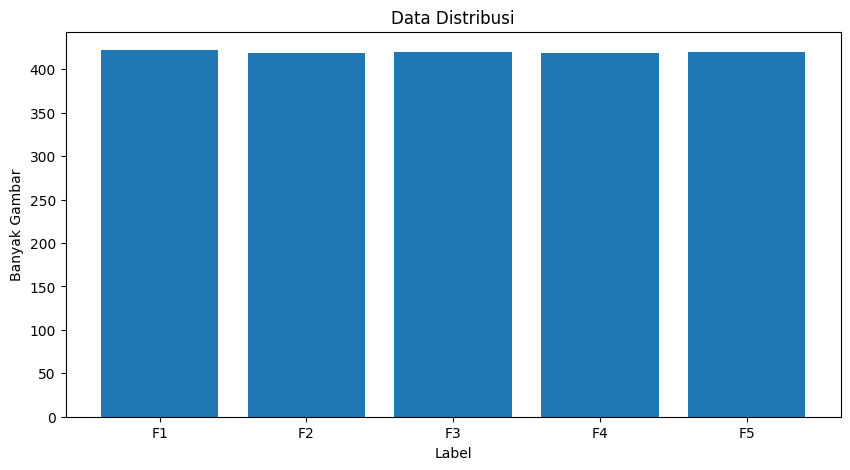

In [5]:
def distribusiImg(datadistribusi):
    plt.figure(figsize=(10, 5))
    plt.bar(datadistribusi.keys(), datadistribusi.values())
    plt.xlabel('Label')
    plt.ylabel('Banyak Gambar')
    plt.title('Data Distribusi')
    plt.show()
distribusiImg(distribusi)

In [6]:
def cariIndex(label, label_name):
    return label.index(label_name)

Code diatas merupakan fungsi cariIndex memiliki tujuan untuk mencari indeks dari suatu label tertentu dalam daftar label yang diberikan. Fungsi ini menerima dua parameter: label, yang merupakan daftar label, dan label_name, yang merupakan nama label yang ingin dicari indeksnya. Fungsi ini menggunakan metode index() dari tipe data list untuk mencari indeks dari label_name dalam label dan mengembalikan indeks tersebut. 

In [7]:
jari1 = data[cariIndex(namaFile, '05_f1d022029_1_1.jpg')]
jari2 = data[cariIndex(namaFile, '05_f1d022029_2_1.jpg')]
jari3 = data[cariIndex(namaFile, '05_f1d022029_3_1.jpg')]
jari4 = data[cariIndex(namaFile, '05_f1d022029_4_1.jpg')]
jari5 = data[cariIndex(namaFile, '05_f1d022029_5_1.jpg')]

jari = [jari1, jari2, jari3, jari4, jari5]

Code di atas digunakan untuk mengambil data gambar jari-jari tertentu dari dataset berdasarkan nama file gambar. Setiap variabel jari1, jari2, jari3, jari4, dan jari5 memuat data gambar untuk masing-masing jari, yang ditemukan dalam dataset menggunakan fungsi cariIndex. Variabel jari kemudian digunakan untuk mengelompokkan data gambar dari setiap jari ke dalam sebuah list.

Code dibawah ini merupakan fungsi displayJari digunakan untuk menampilkan gambar-gambar jari beserta labelnya dalam bentuk grid 1x5. Dengan ukuran gambar yang ditetapkan sebesar 10x10 inci menggunakan plt.figure(), fungsi ini menggunakan perulangan for untuk menampilkan setiap gambar jari dalam variabel data secara berurutan. Pada setiap iterasi, fungsi ini menggunakan plt.subplot() untuk menetapkan posisi subplot dalam grid 1x5. Gambar jari ditampilkan menggunakan plt.imshow(), sementara label jari ditampilkan sebagai judul subplot menggunakan plt.title(). Fungsi ini juga menonaktifkan tampilan sumbu menggunakan plt.axis('off'). 

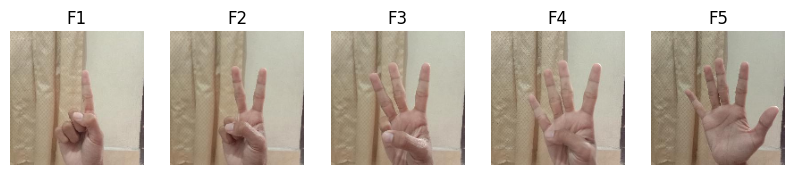

In [8]:
def displayJari(data, label):
    plt.figure(figsize=(10, 10))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(data[i])
        plt.title(label[i])
        plt.axis('off')
    

displayJari(jari, label)

## Data Preparation

### Data Augmentation

In [9]:
def rotasiImg (image, derajat):
        rotasi = image.copy()
        sudut= np.deg2rad(derajat)
        tinggi = int((image.shape[1]-1)/2)
        lebar = int((image.shape[0]-1)/2)
        for i in range (rotasi.shape[0]):
            for j in range (rotasi.shape[1]):
                x=(i-tinggi)*np.cos(sudut)+(j-lebar)*np.sin(sudut)
                y=-(i-tinggi)*np.sin(sudut)+(j-lebar)*np.cos(sudut)
                x = int(x + tinggi)
                y = int(y + lebar)
                if x>=0 and y>=0 and x<rotasi.shape[0] and y<rotasi.shape[1] :
                    rotasi[i][j]= image[x][y]
        return rotasi

In [10]:
def mirorImg(image, axis):
        miror = image.copy()
        if axis == 0:
            for i in range (miror.shape[0]):
                for j in range (miror.shape[1]):
                    miror[i][j] = image[miror.shape[0]-1-i][j]
        elif axis == 1:
            for i in range (miror.shape[0]):
                for j in range (miror.shape[1]):
                    miror[i][j] = image[i][miror.shape[1]-1-j]
        return miror

In [11]:
def augmentasi(data, filenames, banyakData=4):
    dataAug = []
    filnamaAug = []
    for i in tqdm(range(len(data))):
        dataAug.append(data[i])
        filnamaAug.append(filenames[i])
        liatAngle = set()
        for j in range(banyakData):
            image = data[i]
            kemungkinanAngle = [angle for angle in range(5, 360, 5) if angle not in liatAngle]
            sudut = random.choice(kemungkinanAngle)
            while sudut in liatAngle:
                sudut = random.randint(1, 360)
            liatAngle.add(sudut)
            augment = random.randint(0, 1)
            if augment == 0:
                image = rotasiImg(image, sudut)
                image = mirorImg(image, 0)
            else:
                image = rotasiImg(image, sudut)
                image = mirorImg(image, 1)
            dataAug.append(image)
            filnamaAug.append(filenames[i])
    return dataAug, filnamaAug

In [12]:
namaSample = ['05_f1d022029_1_1.jpg', '05_f1d022029_2_1.jpg', '05_f1d022029_3_1.jpg', '05_f1d022029_4_1.jpg', '05_f1d022029_5_1.jpg']
sampleAugmentasi, namaSample = augmentasi(jari, namaSample)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


In [13]:
dataAugment, namafileAugment = augmentasi(data, namaFile)

100%|██████████| 2100/2100 [23:57<00:00,  1.46it/s]


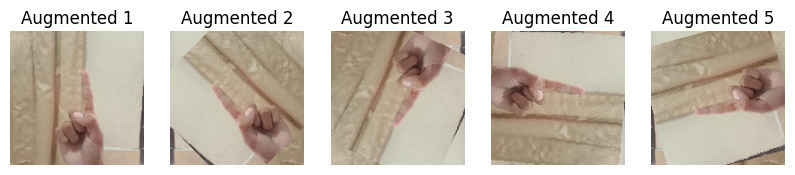

In [14]:
sampelIdx = cariIndex(namafileAugment, '05_f1d022029_1_1.jpg')
sampleAugment1 = dataAugment[sampelIdx]
sampleAugment2 = dataAugment[sampelIdx+1]
sampleAugment3 = dataAugment[sampelIdx+2]
sampleAugment4 = dataAugment[sampelIdx+3]
sampleAugment5 = dataAugment[sampelIdx+4]

sampelAug = [sampleAugment1, sampleAugment2, sampleAugment3, sampleAugment4, sampleAugment5]
labelAug = ['Augmented 1', 'Augmented 2', 'Augmented 3', 'Augmented 4', 'Augmented 5']


displayJari(sampelAug, labelAug)


### Preprocessing

#### Preprocessing 1

In [15]:
def hapusBgr(image):
    imagebgr = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    
    hsv = cv.cvtColor(imagebgr, cv.COLOR_BGR2HSV)

    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

    mask = cv.inRange(hsv, lower_skin, upper_skin)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

    result = cv.bitwise_and(image, image, mask=mask)

    return result

def deleteBackgroundData(data):
    no_background_data = []
    for i in tqdm(range(len(data))):
        no_background_data.append(hapusBgr(data[i]))
    return no_background_data

In [16]:
noBgr = deleteBackgroundData(dataAugment)

100%|██████████| 10500/10500 [00:03<00:00, 3267.02it/s]


#### Preprocessing 2

In [17]:
def graySacle(img):
    gaussKernel = np.ones((3,3))/9
    r = img[:,:,2]
    g = img[:,:,1]
    b = img[:,:,0]
    filteredR = cv.filter2D(r,-1,gaussKernel)
    filteredG = cv.filter2D(g,-1,gaussKernel)
    filteredB = cv.filter2D(b,-1,gaussKernel)
    return np.round(filteredR/3 + filteredG/3 + filteredB/3).astype(np.uint8)

def graySacleData(data):
    gray_data = []
    for i in tqdm(range(len(data))):
        gray_data.append(graySacle(data[i]))
    return gray_data

In [18]:
grayData = graySacleData(noBgr)

  0%|          | 0/10500 [00:00<?, ?it/s]

100%|██████████| 10500/10500 [00:04<00:00, 2603.09it/s]


#### Preprocessing n

In [19]:
def findPixel(img,skala=256):
    pixel = np.zeros(skala)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel[int(img[i,j])] =  pixel[int(img[i,j])] + 1
    return pixel

def findProbability(img, pixel,skala=256):
    for i in range(skala):
        pixel[i] = pixel [i] / (img.shape[0] * img.shape[1])
    return pixel

def findCumulative(arr,skala=256):
    for i in range(skala):
        if i != 0:
            arr[i] = arr[i] + arr[i-1]
    return arr

def equalization(img):
    pixel = findPixel(img)
    pixel = findProbability(img,pixel)
    pixel = findCumulative(pixel)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j] = pixel[int(img[i,j])] * 255
    return img

def equalizationData(data):
    equalized_data = []
    for i in tqdm(range(len(data))):
        equalized_data.append(equalization(data[i]))
    return equalized_data

In [20]:
equalData = equalizationData(grayData)

  0%|          | 0/10500 [00:00<?, ?it/s]

100%|██████████| 10500/10500 [05:04<00:00, 34.48it/s]


In [21]:
Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

def convolution(image, kernel, paddingImage):
    result = np.zeros([image.shape[0], image.shape[1]])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    result[i][j] += paddingImage[i+k, j+l] * kernel[k, l]
    return result

def findGradient (image, kernel): 
    centerx, centery = int((kernel.shape[0] - 1)/2), int((kernel.shape[1] - 1)/2)
    paddingImage =  np.pad(array = image, pad_width = ((centerx, kernel.shape[0]-1-centerx), (centery, kernel.shape[1]-1-centery)), mode ="constant") 
    return convolution(image, kernel, paddingImage)

def detect(image, kernelx, kernely):
  resultx = findGradient(image, kernelx)
  resulty = findGradient(image, kernely)
  result = abs(resultx) + abs(resulty)
  return result

def detectData(data, kernelx, kernely):
    detected_data = []
    for i in tqdm(range(len(data))):
        detected_data.append(detect(data[i], kernelx, kernely))
    return detected_data

In [22]:
sobelData = detectData(equalData, Sx, Sy)

 57%|█████▋    | 5950/10500 [41:39<32:27,  2.34it/s]  

In [ ]:
def normalisasi (image):
    min_val = np.min(image)
    max_val = np.max(image)
    
    normalisasi_img = (image-min_val)/(max_val-min_val)
    uint8_img = (normalisasi_img * 255).astype(np.uint8)
    
    return uint8_img

def normalisasiData(data):
    normalized_data = []
    for i in tqdm(range(len(data))):
        normalized_data.append(normalisasi(data[i]))
    return normalized_data

In [ ]:
normalData = normalisasiData(sobelData)

100%|██████████| 10500/10500 [00:01<00:00, 6303.80it/s]


### Feature Extraction

### Features Selection

In [ ]:
def matriksTransformasi(matriks):
    hasil = np.zeros(matriks.shape)
    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            hasil[i][j] = matriks[j][i]
    return hasil
def sum(matriks):
    hasil = 0
    for i in range(len(matriks)):
        for j in range(len(matriks[0])):
            hasil += matriks[i][j]
    return hasil

def derajat(img, derajat):
    max = np.max(img)
    temp=np.zeros([max+1,max+1])
    if derajat == 0:
        for i in range (len(img)):
            for j in range (len(img[0])-1):
                temp[img[i,j],img[i,j+1]] += 1
    elif derajat == 45:
        for i in range (len (img)-1):
            for j in range (len (img[0])-1):
                temp[img[i+1,j],img[i,j+1]] += 1
    elif derajat == 90:
        for i in range (len (img)-1):
            for j in range (len (img[0])):
                temp[img[i+1,j],img[i,j]] += 1
    elif derajat == 135:
        for i in range (len (img)-1):
            for j in range (len (img[0])-1):
                temp[img[i,j],img[i+1,j+1]] += 1
    hasil = temp+matriksTransformasi(temp)
    total = sum(hasil)
    for i in range (len (hasil)):
        for j in range (len (hasil)):
            hasil[i,j]/=total
    return hasil

def ekstraksi(image):
    hasil = []
    for img in tqdm(image):
        data = []
        data.append(derajat(img,0))
        data.append(derajat(img,45))
        data.append(derajat(img,90))
        data.append(derajat(img,135))
        hasil.append(data)    
    return hasil

In [ ]:
ekstraksiData = ekstraksi(normalData)

 75%|███████▌  | 7889/10500 [42:56<14:12,  3.06it/s]  


MemoryError: Unable to allocate 512. KiB for an array with shape (256, 256) and data type float64

In [ ]:
def contrast (data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=data[i,j]*pow(i-j,2)
    return hasil
def dissimilarity(data):  
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=data[i,j]*abs(i-j)
    return hasil
def homogeneity(data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil+=(data[i,j]/(1+pow(i-j,2)))
    return hasil
def energy(data):
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil += data[i][j] ** 2
    return hasil
def correlation(data):
    mean = np.zeros((2))
    std = np.zeros((2))
    for i in range(len(data)):
        for j in range(len(data[0])):
            mean[0] += i*data[i,j]
            mean[1] += j*data[i,j]
    for i in range(len(data)):
        for j in range(len(data[0])):
            std[0] += pow(i-mean[0],2)*data[i,j]
            std[1] += pow(j-mean[1],2)*data[i,j]
    std[0] = math.sqrt(std[0])
    std[1] = math.sqrt(std[1])
    hasil = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            hasil += (i-mean[0])*(j-mean[1])*data[i,j]/(std[0]*std[1])
    return hasil
def entropy(data):
    entropy = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            if data[i][j] > 0.0:
                entropy += -(data[i][j] * math.log(data[i][j]))
    return entropy
def asm(data):
    asm = 0
    for i in range(len(data)):
        for j in range(len(data[0])):
            asm += data[i][j] ** 2
    return asm

In [ ]:
angles = ['0', '45', '90', '135']
fiturs = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
result = []
batas_gambar = len(ekstraksiData)

for i in tqdm(range(batas_gambar)):
    extracted_data = [augmentasiFilenames[i]]
    for j in range(len(ekstraksiData[i])):
        contrast_val = contrast(ekstraksiData[i][j])
        extracted_data.append(contrast_val)
    for j in range(len(ekstraksiData[i])):
        dissimilarity_val = dissimilarity(ekstraksiData[i][j])
        extracted_data.append(dissimilarity_val)
    for j in range(len(ekstraksiData[i])):
        homogeneity_val = homogeneity(ekstraksiData[i][j])
        extracted_data.append(homogeneity_val)
    for j in range(len(ekstraksiData[i])):
        energy_val = energy(ekstraksiData[i][j])
        extracted_data.append(energy_val)
    for j in range(len(ekstraksiData[i])):
        correlation_val = correlation(ekstraksiData[i][j])
        extracted_data.append(correlation_val)
    for j in range(len(ekstraksiData[i])):
        asm_val = asm(ekstraksiData[i][j])
        extracted_data.append(asm_val)
        entropy_val = entropy(ekstraksiData[i][j])
        extracted_data.append(entropy_val)
    result.append(extracted_data)

In [ ]:
headers = ['filename']
for fitur in fiturs:
    headers.extend([f'{fitur}_{angle}' for angle in angles])
headers.extend([f'asm_{angle}' for angle in angles])
headers.extend([f'entropy_{angle}' for angle in angles])

df = pd.DataFrame(result, columns=headers)
df.to_csv('hasilPercobaan1.csv', index=False)

In [ ]:
df

### Splitting Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('hasilPercobaan1.csv')

X = df.drop('filename', axis=1)
y = df['filename']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalization

In [ ]:
X_train = normalisasi(X_train)
X_test = normalisasi(X_test)

## Modeling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

In [ ]:
models = {'KNN': knn_pred, 'SVM': svm_pred, 'Random Forest': rf_pred}
results = {}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = [accuracy, precision, recall, f1]

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
print(results_df)

## Evaluation

In [ ]:
cm_knn = confusion_matrix(y_test, rf_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
cm_rf = confusion_matrix(y_test, knn_pred)


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm_knn, annot=True, fmt='g', ax=axes[0], cmap='coolwarm')
axes[0].set_title('KNN')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_svm, annot=True, fmt='g', ax=axes[1], cmap='coolwarm')
axes[1].set_title('SVM')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(cm_rf, annot=True, fmt='g', ax=axes[2], cmap='coolwarm')
axes[2].set_title('RF')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.show()